In [1]:
import numpy as np
import torch 
import matplotlib.pyplot as plt
from matplotlib import cm
import jax.numpy as jnp # this is a thin wrapper to NumPy within JAX
from jax import grad, hessian

In [2]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 2
mpl.rc('xtick', labelsize=24) 
mpl.rc('ytick', labelsize=24) 
mpl.rc('axes', labelsize=24) 
mpl.rc('font', size=24) 

# comment out the lines below if you don't have LaTeX installed
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
})

# Step length calculation

# Define your function and its bounds

In [4]:
branin_ = lambda x: 
bounds_branin = np.array([[-5., 0], [10., 15.]])

# Main optimization loop

In [5]:
func  = branin_       # function I am minimizing

x0    = np.array([[6., 14.]]) # starting point
g_inf = 10            # starting gradient infinity norm
eps   = 1e-5          # tolerance for convergence
k     = 0             # iteration counter
maxiters = 20         # maximum number of iterations
xk    = x0            # starting point 

bounds= bounds_branin # optimization variable bounds
fk    = func(xk)

# empty lists to store optimization history
ginf_sd_b = []        # first-order optimality
xk_sd_b   = []        # iterate history
xk_sd_b.append(x0)    ## include the starting point
ncalls_sd_b = []      # number of function calls
f_sd_b      = []      # objective history

np.set_printoptions(precision=3)
print(f'starting point x0: {xk}, f0: {fk}')
print('----------------------------------')

while g_inf >= eps and k < maxiters:    
    pk = -gk/np.linalg.norm(gk)                # steepest-descent direction
    sl = Step_Length(func, xk, pk)             # calculate step length
    alpha = sl.line_search()        
    xk = xk + alpha * pk                       # new iterate
    fk = func(xk)                              # evaluate f at new iterate
    g_inf = np.linalg.norm(gk, ord=np.inf)     # check first-order optimality (gradient)
    
    k += 1
    ncalls_sd_b.append(sl.ncalls + 1)
    ginf_sd_b.append(g_inf)
    xk_sd_b.append(xk)
    f_sd_b.append(fk)

    print(f'iteration {k}, nfcalls: {sl.ncalls + 1}, alpha: {alpha:1.7f}, xk: {xk.squeeze()}, fk: {fk.item():2.6f}, gradient norm: {g_inf:2.6f}')

starting point x0: [[ 6. 14.]], f0: [185.595]
----------------------------------
iteration 1, nfcalls: 18, alpha: 13.0639297, xk: [4.121 1.072], fk: 4.964353, gradient norm: 25.797310
iteration 2, nfcalls: 11, alpha: 1.3327688, xk: [2.804 1.273], fk: 2.580595, gradient norm: 7.378316
iteration 3, nfcalls: 11, alpha: 0.8454406, xk: [3.568 1.635], fk: 1.365767, gradient norm: 5.405031
iteration 4, nfcalls: 14, alpha: 0.6117564, xk: [2.966 1.748], fk: 0.990626, gradient norm: 3.524167
iteration 5, nfcalls: 14, alpha: 0.4425405, xk: [3.365 1.94 ], fk: 0.664837, gradient norm: 2.775701
iteration 6, nfcalls: 16, alpha: 0.1825847, xk: [3.185 1.972], fk: 0.479659, gradient norm: 1.887360
iteration 7, nfcalls: 14, alpha: 0.3476368, xk: [3.181 2.319], fk: 0.411120, gradient norm: 0.538769
iteration 8, nfcalls: 23, alpha: 0.0534162, xk: [3.13  2.304], fk: 0.398909, gradient norm: 0.497291
iteration 9, nfcalls: 32, alpha: 0.0125209, xk: [3.141 2.298], fk: 0.398416, gradient norm: 0.077933
iteratio

Text(0, 0.5, '$\\|\\nabla f(x_k)\\|_\\infty$')

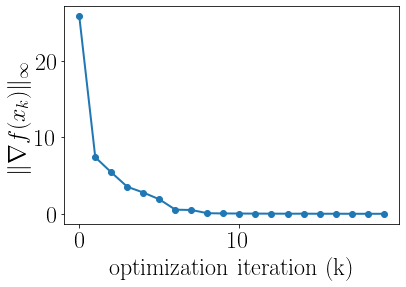

In [6]:
plt.plot(ginf_sd_b, marker='o')
plt.xlabel('optimization iteration (k)')
plt.ylabel(r'$\|\nabla f(x_k)\|_\infty$')

Text(0, 0.5, '$f(x_k)$')

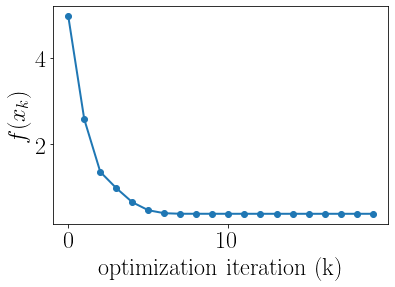

In [7]:
plt.plot(f_sd_b, marker='o')
plt.xlabel('optimization iteration (k)')
plt.ylabel(r'$f(x_k)$')

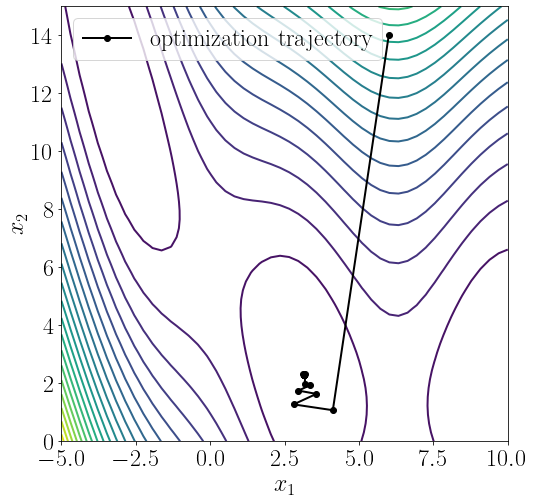

In [8]:
m  =50
xv, yv = np.meshgrid(np.linspace(-5,10, m), np.linspace(0,15,m))
x = np.column_stack((xv.reshape(-1,1), yv.reshape(-1,1)))
y = func(x)

plt.figure(figsize=(8,8))
plt.contour(xv, yv, y.reshape(m,m), levels=20)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.plot(np.concatenate(xk_sd_b)[:,0], np.concatenate(xk_sd_b)[:,1], marker='o', c='k', label='optimization trajectory')
plt.legend()